In [2]:
import pandas as pd

In [3]:
data=pd.read_excel('processed_data_final.xlsx')

In [4]:
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
0,0,2,2,-0.39,2,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
1,1,1,1,0.10,1,1,2,0,1,6,...,False,True,False,False,False,False,True,False,False,False
2,0,1,1,0.96,4,4,3,1,4,7,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,-0.89,5,1,4,1,3,1,...,False,False,False,True,False,False,False,False,True,False
4,0,2,1,0.10,1,3,5,1,1,7,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,2,2,-0.64,3,4,4405,0,2,1,...,False,False,False,True,False,True,False,False,False,False
4296,0,2,1,-0.52,4,3,4406,0,1,6,...,False,True,False,False,False,True,False,False,False,False
4297,0,2,1,-0.89,4,3,4407,1,1,2,...,False,True,False,False,False,False,True,False,False,False
4298,0,2,1,1.95,2,1,4408,1,2,7,...,False,True,False,False,False,False,True,False,False,False


In [5]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [9]:
rf = RandomForestClassifier()

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = rf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9651162790697675


In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [16]:
# Create a random forest classifier
rf = RandomForestClassifier()

In [17]:
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

In [18]:
# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BA8C5808D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BA8C57ED10>})

In [19]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

In [20]:
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 130}


In [21]:
# Train a new random forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(n_estimators=130, max_depth=15)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=130)

In [22]:
# Make predictions on the test data
y_pred = best_rf.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9534883720930233
Precision: 0.9685534591194969
Recall: 0.7368421052631579
Confusion Matrix:
 [[1076    5]
 [  55  154]]


In [27]:
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

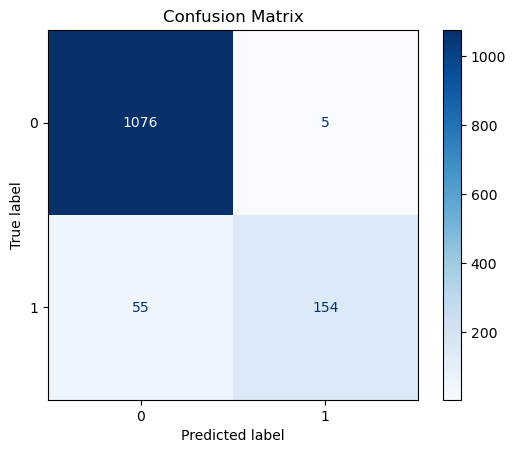

In [28]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

In [30]:
# Get predicted probabilities for the positive class
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [31]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [32]:
# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

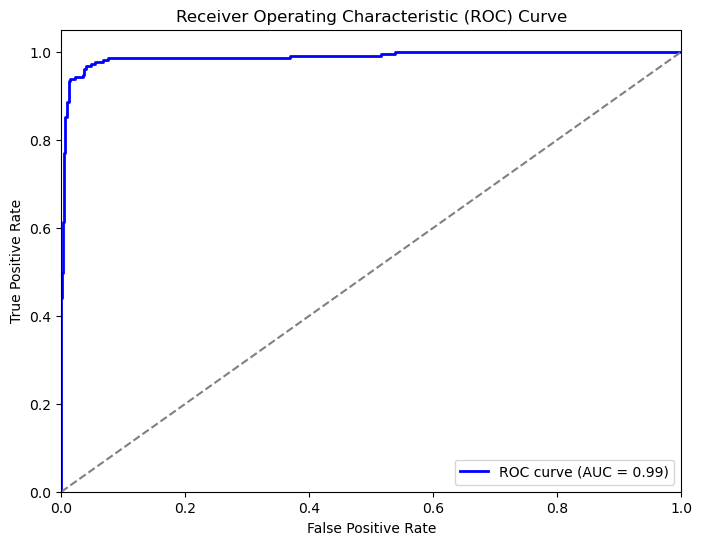

In [33]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
import matplotlib.pyplot as plt

In [35]:
# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

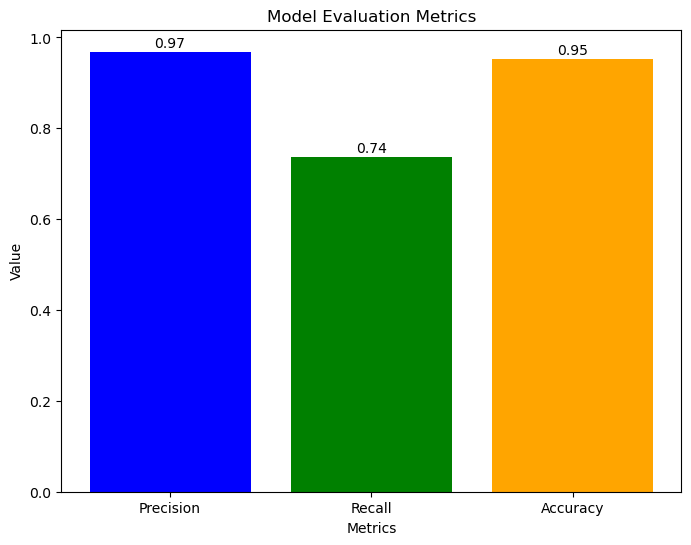

In [36]:
# Plot bar chart
plt.figure(figsize=(8, 6))
metrics = ['Precision', 'Recall', 'Accuracy']
values = [precision, recall, accuracy]
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center')

plt.show()